<a href="https://colab.research.google.com/github/GECarlo/CodingDojo/blob/main/Project_1_Final_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [ ]:
# import file
filename = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(filename)

In [ ]:
# how many rows and columns
df.shape

(8523, 12)

In [ ]:
# what are the datatypes of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# are there duplicates? if so drop them
df.duplicated()

# drop duplicates
df.drop_duplicates(inplace = True)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# find out if there are any patterns in the missing data 
itemid_filter = df['Item_Identifier'] == 'FDA15'
df[itemid_filter]
# seems like items and item_identifiers have uniform weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [ ]:
# create a filter for all NAN values in item_weight
na_weight = df['Item_Weight'].isna()

# filter = df[[column1, column2]][not item_weight or not NAN]
weight_notnull = df[['Item_Identifier', 'Item_Weight']][~na_weight]

# create a dictionary where the index is the item_identifier column and that values are in the item_weight column then create a dictionary 
dict_weight = weight_notnull.set_index('Item_Identifier')['Item_Weight'].T.to_dict()

# fill the NaN values in item_weight column with the values in the dict_weight
df['Item_Weight'] = df.Item_Identifier.map(dict_weight)

In [ ]:
# identify the missing values
df.isna().sum()

# all that is missing are the unique item_identifiers with NaN values

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

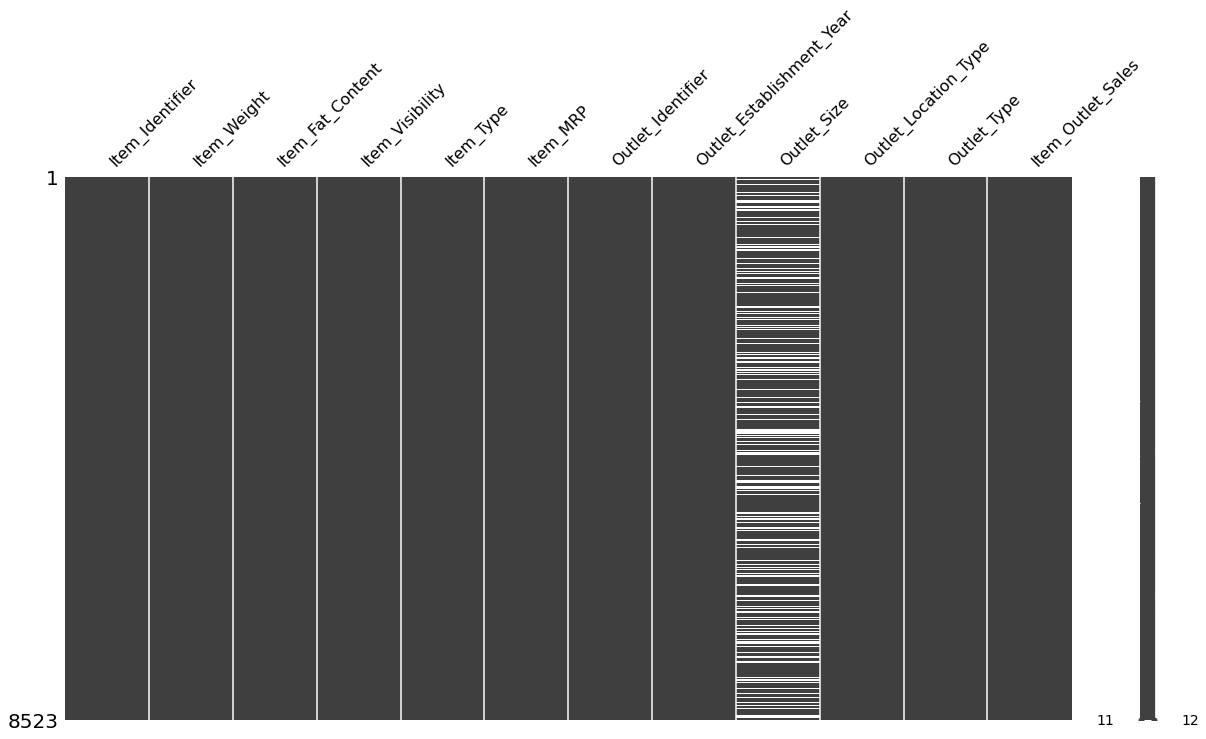

In [ ]:
# use missingno to plot where the missing values are
missingno.matrix(df, figsize = (20, 10));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


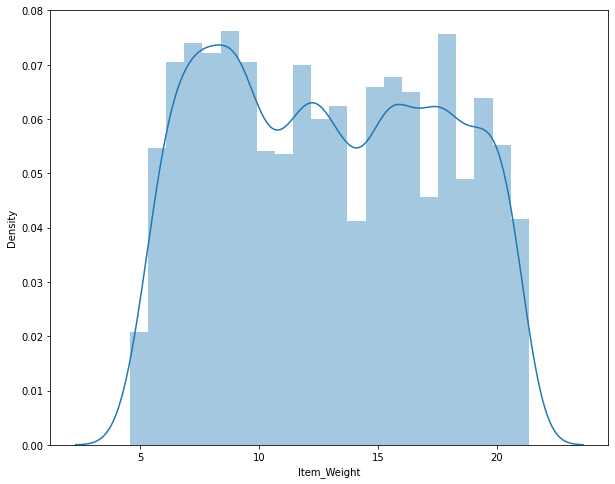

In [ ]:
# decide how to address the missing values and do it. (this requires your judgement so explain your choice) 
# show plot of df with missing values as a point of reference to observe skewness
x = df['Item_Weight']
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(x);

In [ ]:
# using mode to fill missing item_weight
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mode()[0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


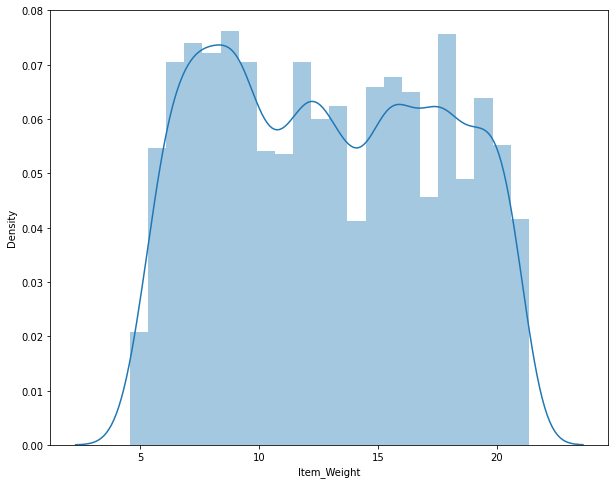

In [ ]:
# testing for skewness vs df with missing values
x = df['Item_Weight']
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(x);

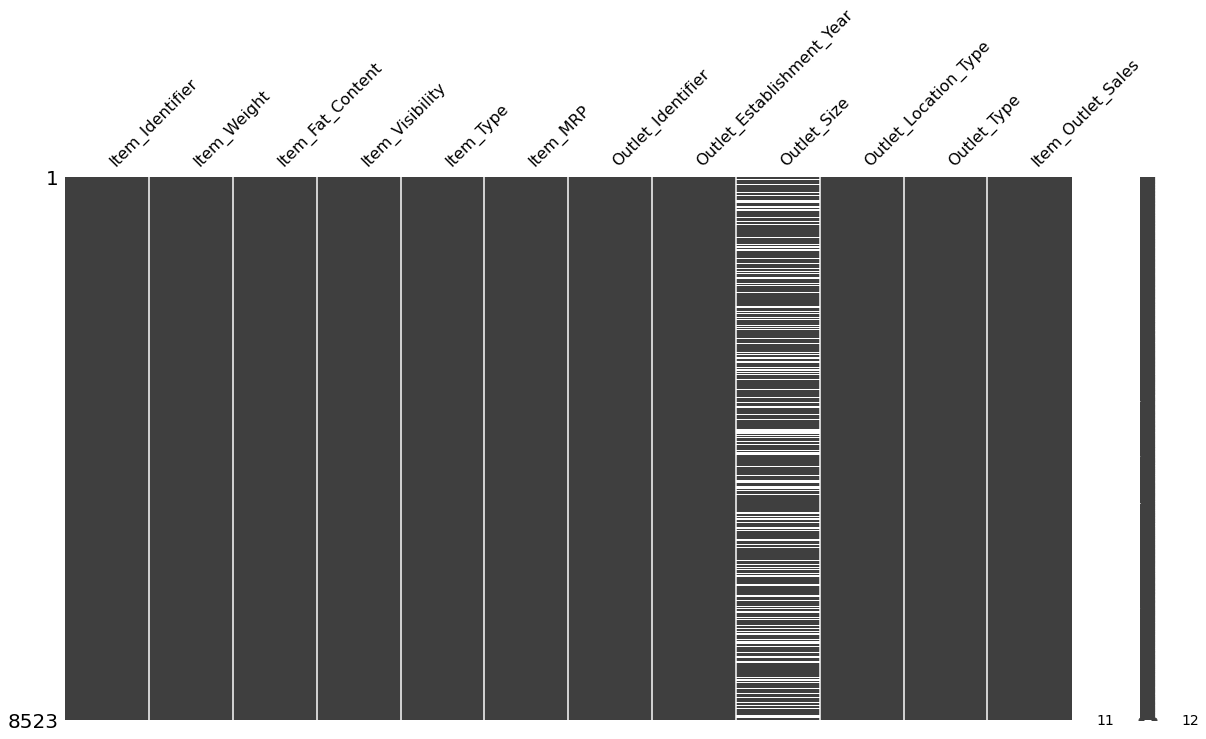

In [ ]:
# confirm that there are no missing values after addressing them
missingno.matrix(df, figsize = (20, 10));

In [ ]:
# using mean to fill missing item_weight
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


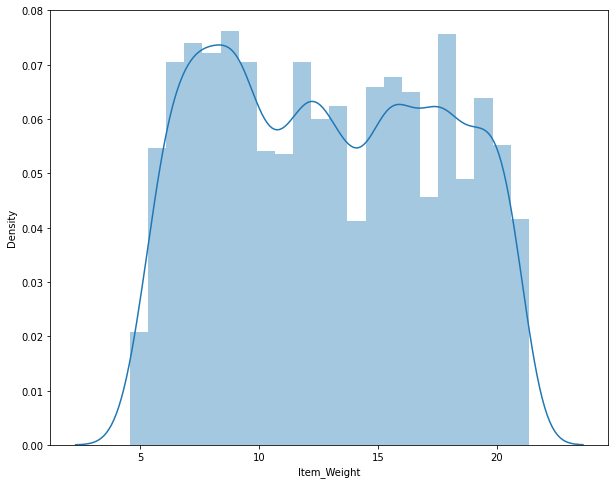

In [ ]:
# testing for skewness vs df with missing values
x = df['Item_Weight']
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(x);

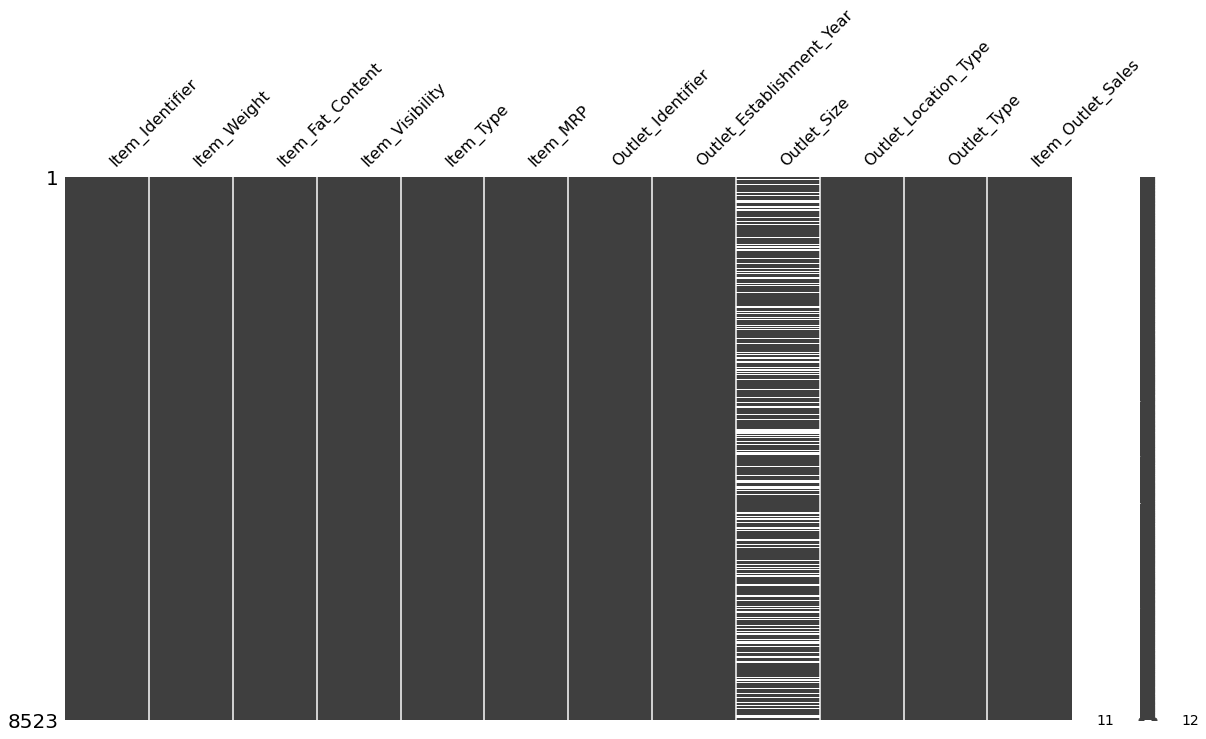

In [ ]:
# confirm that there are no missing values after addressing them
missingno.matrix(df, figsize = (20, 10));

In [ ]:
# using median to fill missing item_weight
df = df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


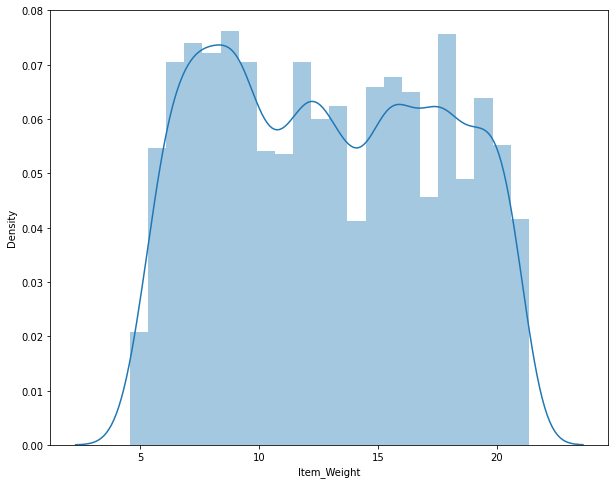

In [ ]:
# testing for skewness vs df with missing values
x = df['Item_Weight']
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(x);

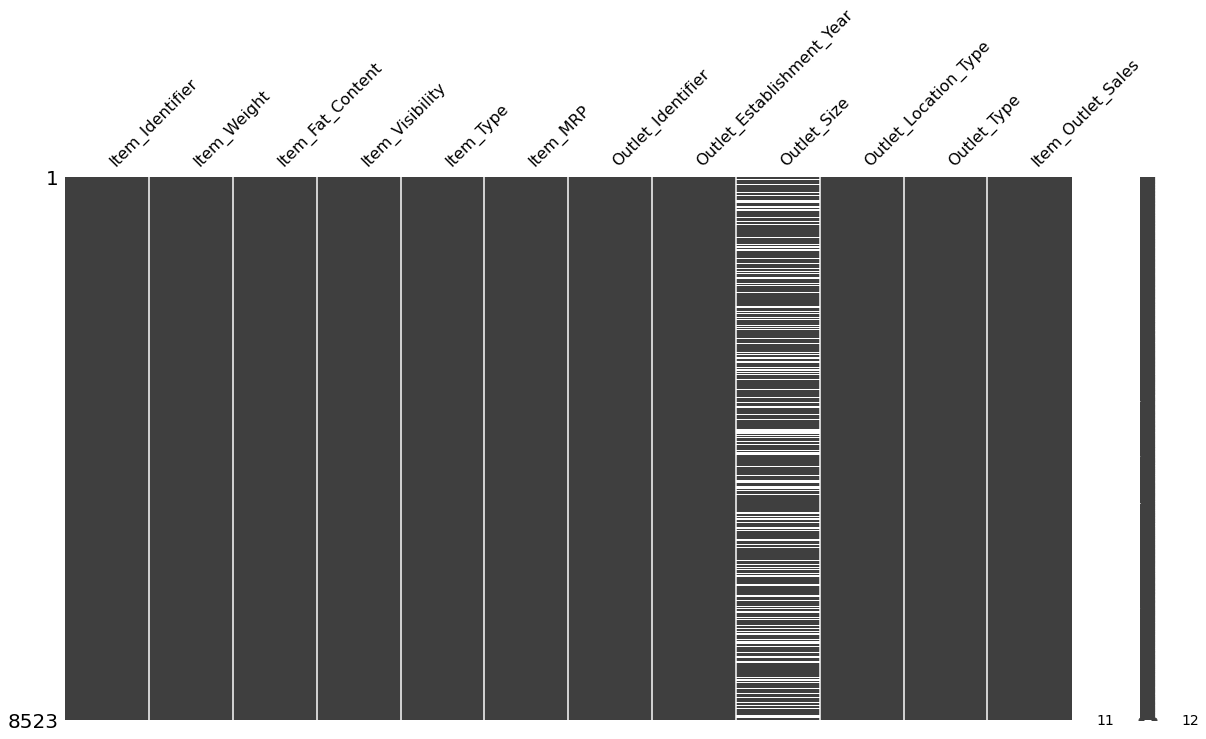

In [ ]:
# confirm that there are no missing values after addressing them
missingno.matrix(df, figsize = (20, 10));

In [ ]:
# decide how to address the missing values and do it. (this requires your judgement so explain your choice)
# having tested the skewness of the data when using mean, median, and mode vs the original dataset
# this suggests that filling the data will have a significant impact in its skewness. Hence, it is recommended that Item_Weight be not used
# df.drop('Item_Weight', inplace = True, axis = 1)
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# find and fix any inconsistent categories of data (Cat > cat to make sure they are consistent)
for columns in df:
  print(df[columns].value_counts())

# Item_Fat_Content has inconsistent names (LF, low fat, reg)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    109
17.600    102
11.800     90
13.650     89
15.100     86
         ... 
5.675       2
6.520       2
8.800       2
7.890       2
5.210       2
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat  

In [ ]:
# create for loop to replace inconsistent names low fat
# new_name = {}

# for name in df['Item_Fat_Content']:
#   new = name.replace('low fat', 'Low Fat')
#   new_name[name] = new

# df.replace({'Item_Fat_Content': new_name}, inplace = True)

In [ ]:
#for index, row in df.iterrows():
#    print(row['c1'], row['c2'])
df.replace({'Item_Fat_Content' : { 'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular' }}, inplace = True)

In [ ]:
# create for loop to replace inconsistent names LF
# new_name = {}

# for name in df['Item_Fat_Content']:
#   new = name.replace('LF', 'Low Fat')
#   new_name[name] = new

# df.replace({'Item_Fat_Content': new_name}, inplace = True)

In [ ]:
# create for loop to replace inconsistent names reg
# new_name = {}

# for name in df['Item_Fat_Content']:
#   new = name.replace('reg', 'Regular')
#   new_name[name] = new

# df.replace({'Item_Fat_Content': new_name}, inplace = True)

In [ ]:
# check for inconsistent names again
for columns in df:
  print(df['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [ ]:
# for any numerical column, obtain the summary statistics of each (min, max, mean)
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875080,0.066132,140.992782,1997.831867,2181.288914
std,4.645034,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


PART 3

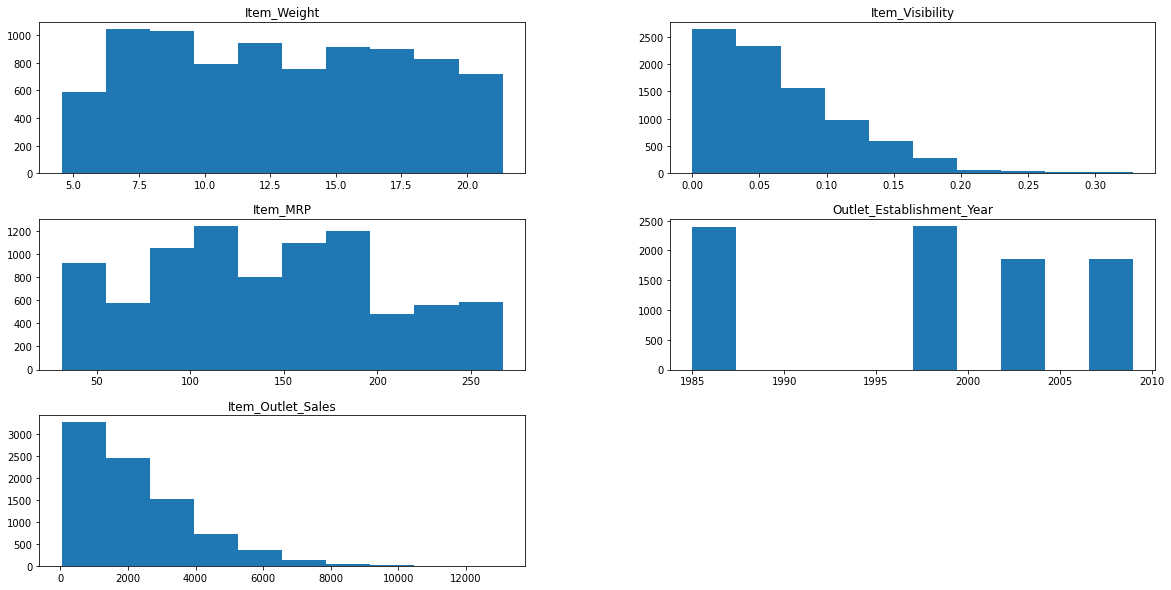

In [ ]:
# For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data.
# This must include at least one of each:
# Histogram to view the distributions of various features in your dataset.

df.hist(figsize = (20, 10), grid = False);

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Boxplot to view statistical summaries of various features in your dataset.
weight = df['Item_Weight']
visibility = df['Item_Visibility']
mrp = df['Item_MRP']
sales = df['Item_Outlet_Sales']

# create subplot for these columns
# plt.boxplot([weight]);
# plt.boxplot([visibility]);
# plt.boxplot([mrp]);
# plt.boxplot([sales]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

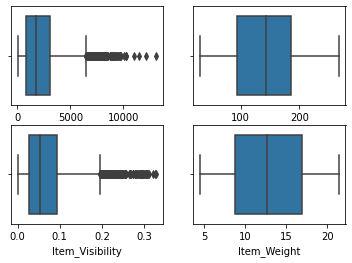

In [ ]:
plt.subplot(2,2,1);
sns.boxplot(df['Item_Outlet_Sales']);

plt.subplot(2,2,2);
sns.boxplot(df['Item_MRP']);

plt.subplot(2,2,3);
sns.boxplot(df['Item_Visibility']);

plt.subplot(2,2,4);
sns.boxplot(df['Item_Weight']);

In [ ]:
# Heatmap of the correlation between features.

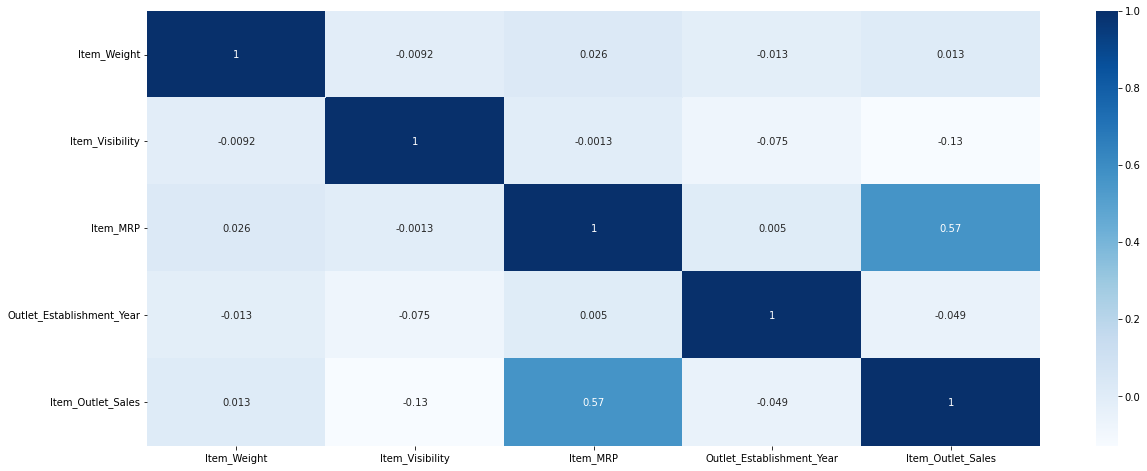

In [ ]:
corr = df.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr, cmap = 'Blues', annot = True);

# the results suggest that there is moderate (0.57) correlation between item_MRP and Item_Outlet_Sales

# Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis)
# Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


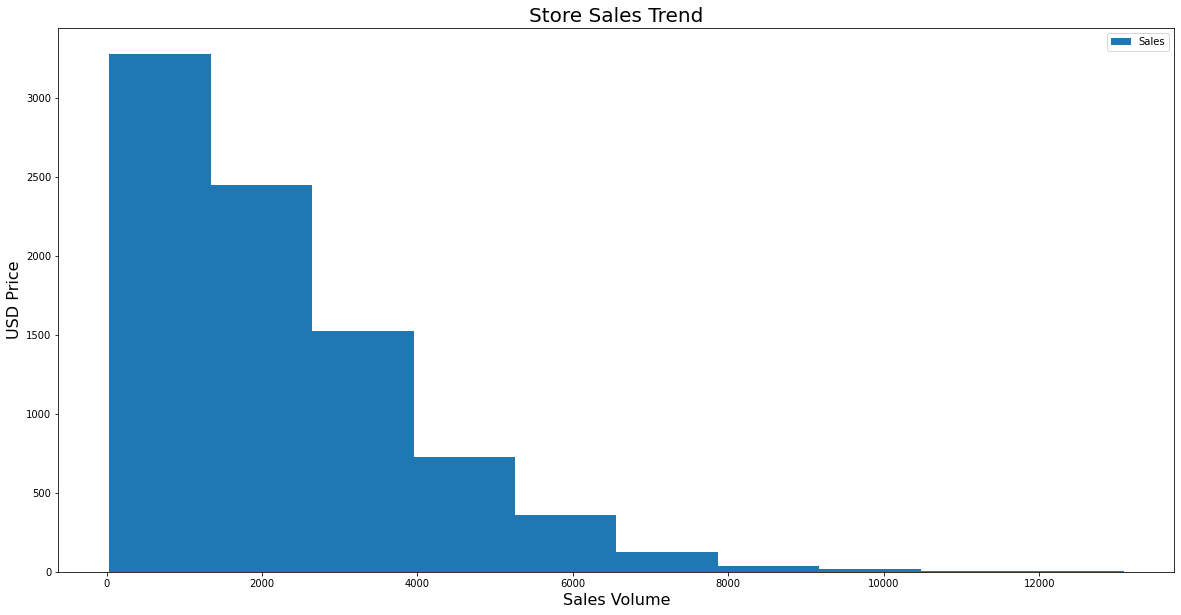

In [ ]:
# graph 1 = Item_Outlet_Sales + Item_MRP (manu retail price)
# set variables
sales = df['Item_Outlet_Sales']

sales.hist(figsize = (20, 10), grid = False, label = 'Sales');
plt.title('Store Sales Trend', fontsize = 20)
plt.xlabel('Sales Volume', fontsize = 16)
plt.ylabel('USD Price', fontsize = 16)
plt.legend(loc = 'upper right');

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

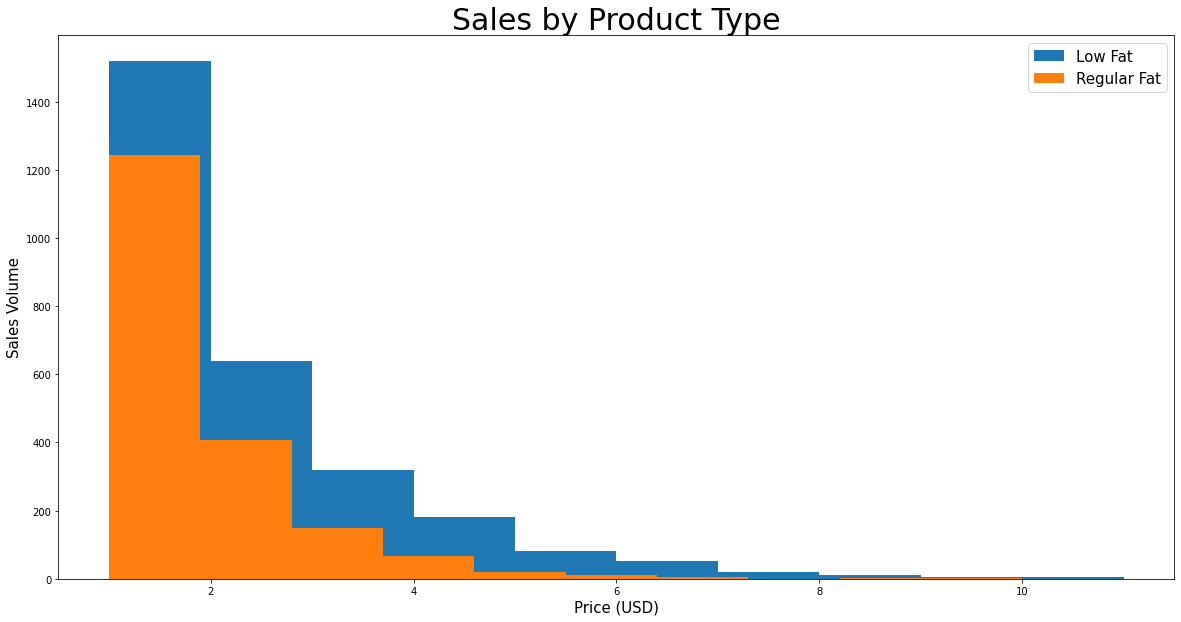

In [ ]:
# low fat sales
lowFat = df['Item_Fat_Content'] == 'Low Fat'
lowFatSales = df[lowFat]['Item_Outlet_Sales'].value_counts()

# regular sales
reg = df['Item_Fat_Content'] == 'Regular'
regSales = df[reg]['Item_Outlet_Sales'].value_counts()

# plot the data
plot1 = plt.figure(figsize = (20,10));
plt.title('Sales by Product Type', fontsize = 30)
plt.hist(lowFatSales, label = 'Low Fat')
plt.hist(regSales, label = 'Regular Fat')
plt.xlabel('Price (USD)', fontsize = 15)
plt.ylabel('Sales Volume', fontsize = 15)
plt.legend(fontsize = 15);

# this suggests that the best selling products are low fat products which are between $2 - $4

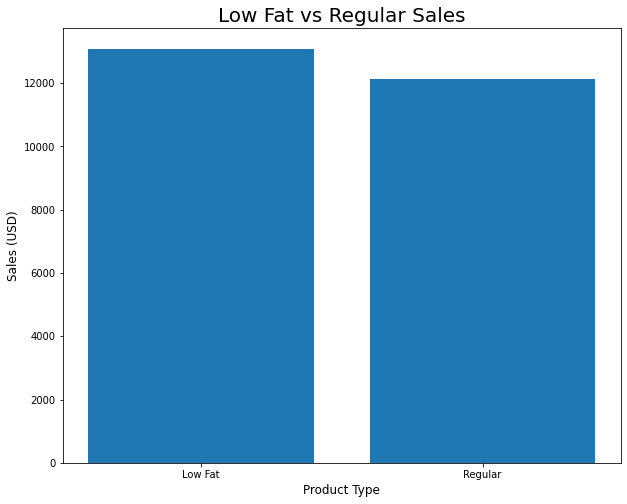

In [ ]:
x = df['Item_Fat_Content']
y = df['Item_Outlet_Sales']

plt.figure(figsize = (10,8));
plt.bar(x, y);
plt.title('Low Fat vs Regular Sales', fontsize = 20)
plt.xlabel('Product Type', fontsize = 12)
plt.ylabel('Sales (USD)', fontsize = 12);

For Part 5, you will go back to your original dataset with the goal of preventing data leakage.  

Please note: If you imputed missing values based on a calculation on the entire dataset (such as mean), you should now perform that step after the train test split using SimpleImputer.  

Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  
Perform a train test split 
Create a pre processing pipeline to prepare the dataset for Machine Learning
Commit your work to GitHub. 

In [ ]:
# import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display = 'diagram')

In [ ]:
# check shape
df.shape

(8523, 12)

In [ ]:
# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [ ]:
# check for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# check for dupes
df.duplicated().sum()

0

In [ ]:
# check for inconsistencies
df.head()

# this dataset has been cleaned previously

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# check statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875080,0.066132,140.992782,1997.831867,2181.288914
std,4.645034,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
# Create dictionary for ordinal datatypes before assigning target (y) and features (X)
# outlet size dictionary
outletSize_dictionary = {'High': 2, 'Medium': 1, 'Small': 0}
df['Outlet_Size'].replace(outletSize_dictionary, inplace = True)
df.head()

# outlet type dictionary
outletType_dictionary = {'Supermarket Type1': 3, 'Supermarket Type2': 2, 'Supermarket Type3': 1, 'Grocery Store': 0}
df['Outlet_Type'].replace(outletType_dictionary, inplace = True)

# outlet location type dictionary
outletLocationType_dictionary = {'Tier 1': 2, 'Tier 2': 1, 'Tier 3': 0}
df['Outlet_Location_Type'].replace(outletLocationType_dictionary, inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,2,3,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,0,2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,2,3,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,0,0,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,0,3,994.7052


In [ ]:
# outlet size is missing 2410 values / 8523 which is 28% of the total dataset
df[df['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,0,0,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,1,3,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,1,3,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,1,3,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,0,0,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,1,3,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,1,3,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,0,0,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,1,3,468.7232


In [ ]:
df.shape

(8523, 12)

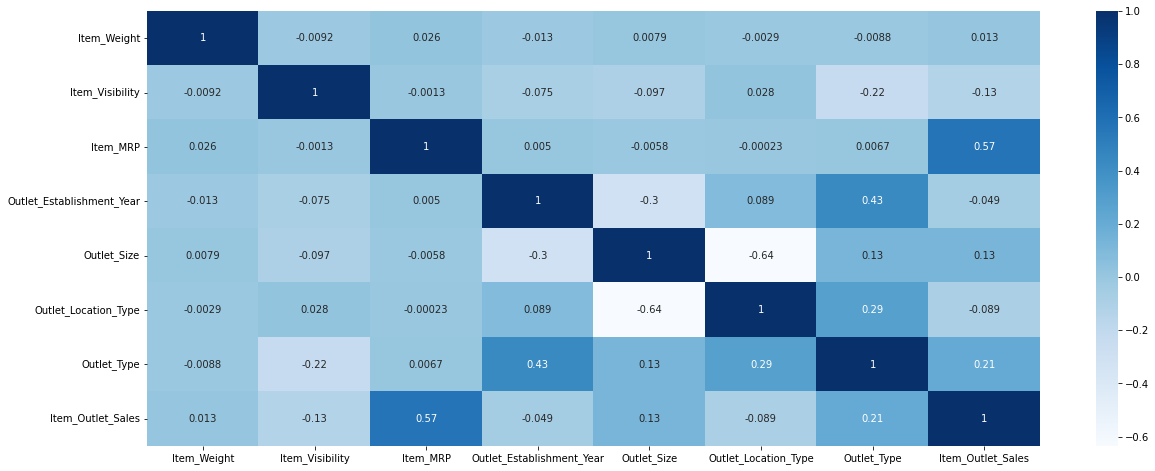

In [ ]:
# find correlation between features
corr = df.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr, cmap = 'Blues', annot = True);

# this suggests that there is there is weak negative correlation between outlet size and type
# there is also moderate correlation between outlet type and outlet establishment year
# there is moderate correlation between item MRP and outlet sales

# therefore we can impute most_frequent for the outlet size bec it has weak correlation (negative)

In [ ]:
# define X features and target y outlet sales
y = df['Item_Outlet_Sales']

# irrelevant variables Outlet_Identifier
X = df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

In [ ]:
# check features
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,1.0,2,3
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,1.0,0,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,1.0,2,3
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,2.0,0,3


In [ ]:
# Perform a train test split Create a pre processing pipeline to prepare the dataset for Machine Learning Commit your work to GitHub.
# train, test, split data for machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Identify each key feature

numeric = Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year

ordinal = Outlet_Size, Outlet_Location_Type, Outlet_Type 

categorical = Item_Identifier, Item_Fat_Content, Item_Type, 

In [ ]:
# use pipeline and column transformer
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [ ]:
# impute missing values
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

In [ ]:
# onehotencode nominal features
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [ ]:
# scale numeric columns
scaler = StandardScaler()

Initiate pipeline for processing

In [ ]:
# categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

# **Project 1 - Final (Core)**

build a linear regression model to predict sales

build a regression tree model to predict sales



In [ ]:
# create tuples
cat_tuple = (categorical_pipe, cat_selector)
num_tuple = (numeric_pipe, num_selector)

In [ ]:
# instantiate transformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [ ]:
preprocessor.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc44b9f5e90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc44b9f5e50>)])

In [ ]:
# transform processed data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# **MACHINE LEARNING**

# linear regression model

In [ ]:
# import libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# linear regression model

# instantiate model
reg = LinearRegression()

# fit the model on hte processed data
reg.fit(X_train_processed, y_train)

# create prediction
trained_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)

print(f' train score {trained_score}')
print(f' test score {test_score}')

 train score 0.5388033996941688
 test score -2.0973512747992934e+20


# regression tree model

In [ ]:
# import libraries
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# regression tree model

# instantiate model
dct = DecisionTreeRegressor()

# fit the model on hte processed data
dct.fit(X_train_processed, y_train)

# create prediction
trained_score = dct.score(X_train_processed, y_train)
test_score = dct.score(X_test_processed, y_test)

print(f' train score {trained_score}')
print(f' test score {test_score}')

 train score 1.0
 test score 0.22510655923283984
